<a href="https://colab.research.google.com/github/blufury/Class-projects/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt


# Dataset Preprocessing

In [3]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
data = pd.read_csv(url)
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [9]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#Scale the Data

In [11]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
x = data.loc[:, features].values
x_normalized = StandardScaler().fit_transform(x)

y = data.species

# PCA for visualization

In [15]:
pca_data = PCA(n_components=2).fit_transform(x_normalized)
pca_data = pd.DataFrame(data=pca_data, columns=['PC1','PC2'])
pca_data = pd.concat([pca_data, data[['species']]], axis=1)
pca_data.head()

,PC1,PC2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


<Axes: xlabel='PC1', ylabel='PC2'>

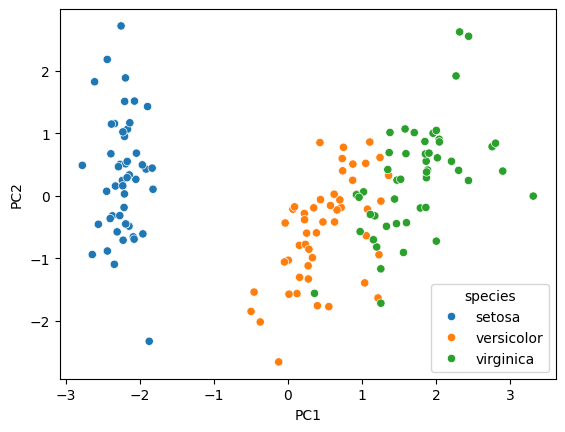

In [18]:
sns.scatterplot(
    data=pca_data,
    x=pca_data['PC1'],
    y=pca_data['PC2'],
    hue=pca_data['species'])

# PCA for efficiency

[2.93035378 0.92740362 0.14834223 0.02074601]
[0.72770452 0.23030523 0.03683832 0.00515193]


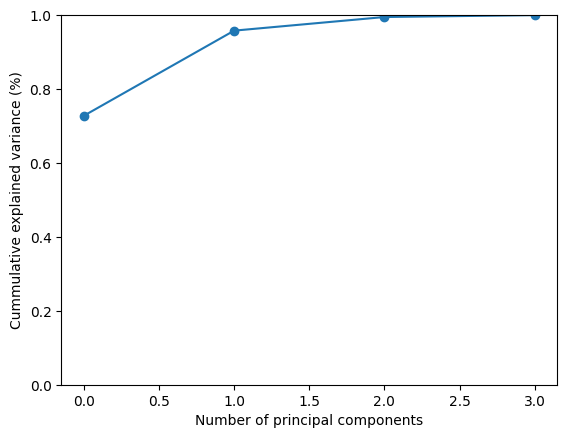

In [32]:
pca_model = PCA(n_components=len(features))
pcas = pca_model.fit(x_normalized)
print(pcas.explained_variance_)
print(pcas.explained_variance_ratio_)

cum_pcas = np.cumsum(pcas.explained_variance_ratio_)
plt.plot(cum_pcas, marker='o')
plt.ylim(0,1)
plt.xlabel('Number of principal components')
plt.ylabel('Cummulative explained variance (%)')
plt.show()

# KMeans

In [33]:
pca_data = PCA(n_components=2).fit_transform(x_normalized)
pca_data = pd.DataFrame(data=pca_data, columns=['PC1','PC2'])
pca_data = pd.concat([pca_data, data[['species']]], axis=1)
pca_data.head()

,PC1,PC2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


<Axes: xlabel='PC1', ylabel='PC2'>

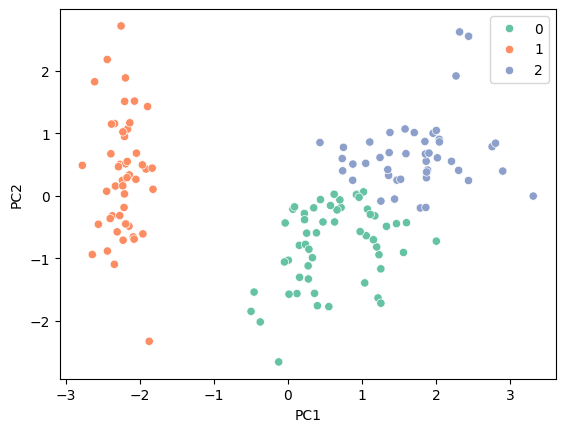

In [41]:
kmeans_model = KMeans(n_clusters=3, random_state=6).fit(x_normalized)
print(kmeans_model.labels_)
sns.scatterplot(
    data=pca_data,
    x=pca_data['PC1'],
    y=pca_data['PC2'],
    hue=kmeans_model.labels_,
    palette='Set2')

In [37]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
